<center><h4>K-Prototypes Analysis (Free Music Archive)</h4></center>

<br>**Problem statement:**
<br>You have a dataset containing over 9000 music tracks with information about each track and artist (check glossary in your input file). Use K-prototypes to
<br> (a) Cluster the dataset
<br> (b) Analyse and describe the clusters
<br> (c) Review the cluster size (k) using Elbow plots

*Import required modules*

In [1]:
import pandas as pd                               #Load datasets & clean dataframes
from kmodes.kprototypes import KPrototypes        #Run k prototypes algorithm
import matplotlib.pyplot as plt                   #Plot outputs
from wordcloud import WordCloud                   #Running Wordclouds
from sklearn.preprocessing import StandardScaler  #Standardization
from sklearn.decomposition import PCA             #PCA function

*Data import*

In [2]:
#Load Excel file into a dataframe
FMADf = pd.read_excel("FreeMusicArchive.xlsx", sheet_name="FMADataset")

# Exclude track_id from clustering algorithm
FMADf = FMADf.loc[:, FMADf.columns != 'track_id']

# Convert categorical variables to string datatype
FMADf['artist_name'] = FMADf['artist_name'].astype(str)
FMADf['type'] = FMADf['type'].astype(str)
FMADf['genre_top'] = FMADf['genre_top'].astype(str)

In [3]:
FMADf.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,artist_discovery,artist_familiarity,artist_hotttnesss,artist_name,type,genre_top
0,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,0.388990,0.386740,0.406370,AWOL,Album,Hip-Hop
1,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,0.388990,0.386740,0.406370,AWOL,Album,Hip-Hop
2,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,0.388990,0.386740,0.406370,AWOL,Album,Hip-Hop
3,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,0.557339,0.614272,0.798387,Kurt Vile,Album,Pop
4,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,0.388990,0.386740,0.406370,AWOL,Album,Hip-Hop


In [4]:
FMADf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9159 entries, 0 to 9158
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acousticness        9159 non-null   float64
 1   danceability        9159 non-null   float64
 2   energy              9159 non-null   float64
 3   instrumentalness    9159 non-null   float64
 4   liveness            9159 non-null   float64
 5   speechiness         9159 non-null   float64
 6   tempo               9159 non-null   float64
 7   valence             9159 non-null   float64
 8   artist_discovery    9159 non-null   float64
 9   artist_familiarity  9159 non-null   float64
 10  artist_hotttnesss   9159 non-null   float64
 11  artist_name         9159 non-null   object 
 12  type                9159 non-null   object 
 13  genre_top           9159 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1001.9+ KB


*Run PCA Algorithm on numerical datatypes to get around 75% variance explained*

In [5]:
# Dataframe of numeric dimensions
FMADf1 = FMADf[['acousticness','danceability','energy','instrumentalness','liveness','speechiness','tempo','valence','artist_discovery','artist_familiarity','artist_hotttnesss']]

# Dataframe of categorical dimensions
FMADf2 = FMADf[['artist_name','type','genre_top']]

In [6]:
# Reduce numerical dimensions using PCA

#Standardize dataframe
FMADf1 = StandardScaler().fit_transform(FMADf1)

#Run the PCA algorithm
pca = PCA(n_components=5)

principalComponents = pca.fit_transform(FMADf1)
FMADf1 = pd.DataFrame(data = principalComponents,
                            columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

#Total variance % emplained by components
print("% variance explained by PC1 + PC2 + PC3 + PC4 + PC5:", round(((pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1] + pca.explained_variance_ratio_[2] + pca.explained_variance_ratio_[3] + pca.explained_variance_ratio_[4])/ 1)*100,2))

% variance explained by PC1 + PC2 + PC3 + PC4 + PC5: 74.08


In [7]:
# Reduced dataframe (Numeric(PCs 1 to 5) + categorical variables)
FMADf_reduced = pd.merge(FMADf1, FMADf2, left_index=True, right_index=True)

In [8]:
FMADf_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9159 entries, 0 to 9158
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PC1          9159 non-null   float64
 1   PC2          9159 non-null   float64
 2   PC3          9159 non-null   float64
 3   PC4          9159 non-null   float64
 4   PC5          9159 non-null   float64
 5   artist_name  9159 non-null   object 
 6   type         9159 non-null   object 
 7   genre_top    9159 non-null   object 
dtypes: float64(5), object(3)
memory usage: 572.6+ KB


*Run k prototypes algorithm*

In [9]:
# Identify which are categorical variables (artist_name (index 5), type (index 6), and genre_top (index 7))
categorical_index = [5, 6, 7]

# Run the k protoypes algorithm for 5 clusters
kproto = KPrototypes(n_clusters=5, verbose=1, max_iter=20)
clusters = kproto.fit_predict(FMADf_reduced, categorical=categorical_index)

# Add cluster number to dataframe
FMADf_reduced['cluster'] = list(clusters)

Initialization method and algorithm are deterministic. Setting n_init to 1.


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 2668, ncost: 54439.30037041604
Run: 1, iteration: 2/20, moves: 1115, ncost: 53797.526536726764
Run: 1, iteration: 3/20, moves: 632, ncost: 53407.26925043138
Run: 1, iteration: 4/20, moves: 757, ncost: 52657.402383420216
Run: 1, iteration: 5/20, moves: 841, ncost: 51897.0401289995
Run: 1, iteration: 6/20, moves: 653, ncost: 51504.53140614469
Run: 1, iteration: 7/20, moves: 447, ncost: 51306.635944987596
Run: 1, iteration: 8/20, moves: 319, ncost: 51207.35922001794
Run: 1, iteration: 9/20, moves: 222, ncost: 51168.23903888158
Run: 1, iteration: 10/20, moves: 102, ncost: 51158.420074086294
Run: 1, iteration: 11/20, moves: 82, ncost: 51152.467253323
Run: 1, iteration: 12/20, moves: 67, ncost: 51147.392061279425
Run: 1, iteration: 13/20, moves: 76, ncost: 51142.25551697908
Run: 1, iteration: 14/20, moves: 57, ncost: 51138.727730681596
Run: 1, iteration: 15/20, moves: 51, ncost: 51

*Plot characteristics of clusters for top genre*

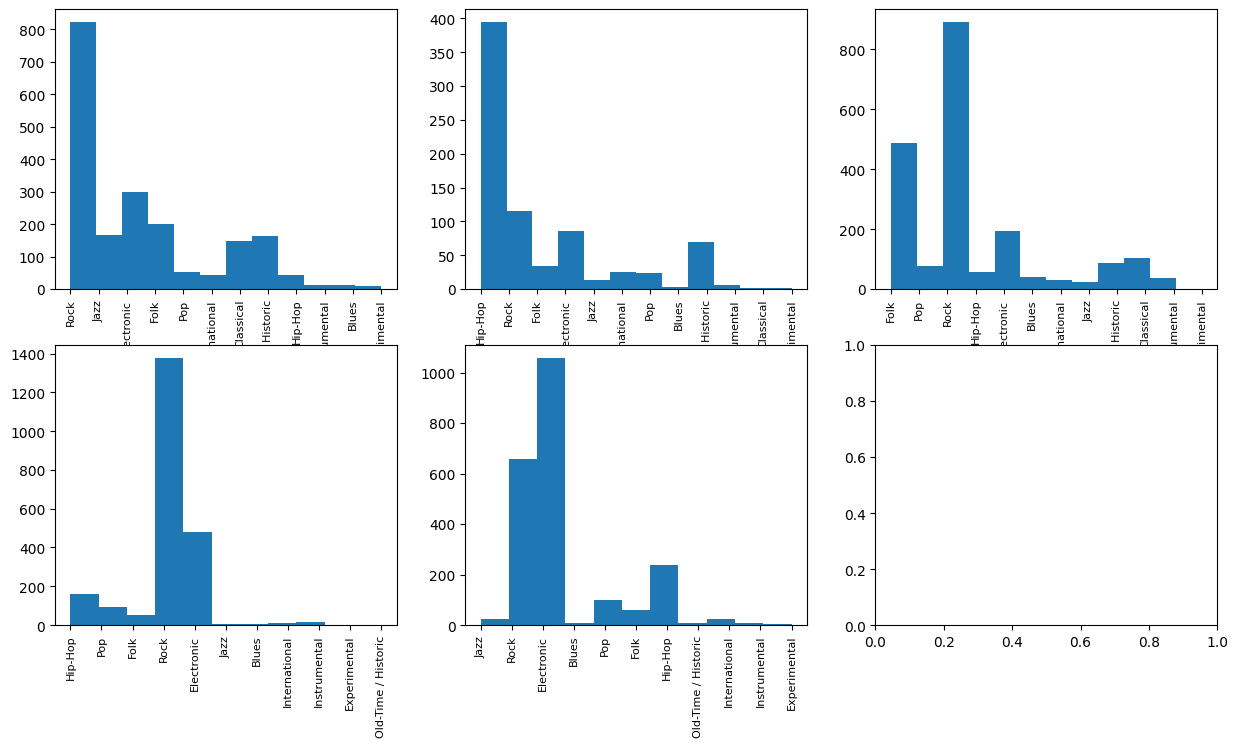

In [10]:
#Understand the distribution of genre per cluster
cluster_0 = FMADf_reduced[clusters == 0]
cluster_1 = FMADf_reduced[clusters == 1]
cluster_2 = FMADf_reduced[clusters == 2]
cluster_3 = FMADf_reduced[clusters == 3]
cluster_4 = FMADf_reduced[clusters == 4]

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(15,8))

ax1.hist(cluster_0['genre_top'], bins=len(set(cluster_0['genre_top'])))
ax2.hist(cluster_1['genre_top'], bins=len(set(cluster_1['genre_top'])))
ax3.hist(cluster_2['genre_top'], bins=len(set(cluster_2['genre_top'])))
ax4.hist(cluster_3['genre_top'], bins=len(set(cluster_3['genre_top'])))
ax5.hist(cluster_4['genre_top'], bins=len(set(cluster_4['genre_top'])))

plt.setp(ax1.get_xticklabels(), fontsize=8, rotation='vertical')
plt.setp(ax2.get_xticklabels(), fontsize=8, rotation='vertical')
plt.setp(ax3.get_xticklabels(), fontsize=8, rotation='vertical')
plt.setp(ax4.get_xticklabels(), fontsize=8, rotation='vertical')
plt.setp(ax5.get_xticklabels(), fontsize=8, rotation='vertical')
plt.show()

*Plot characteristics of clusters for primary components*

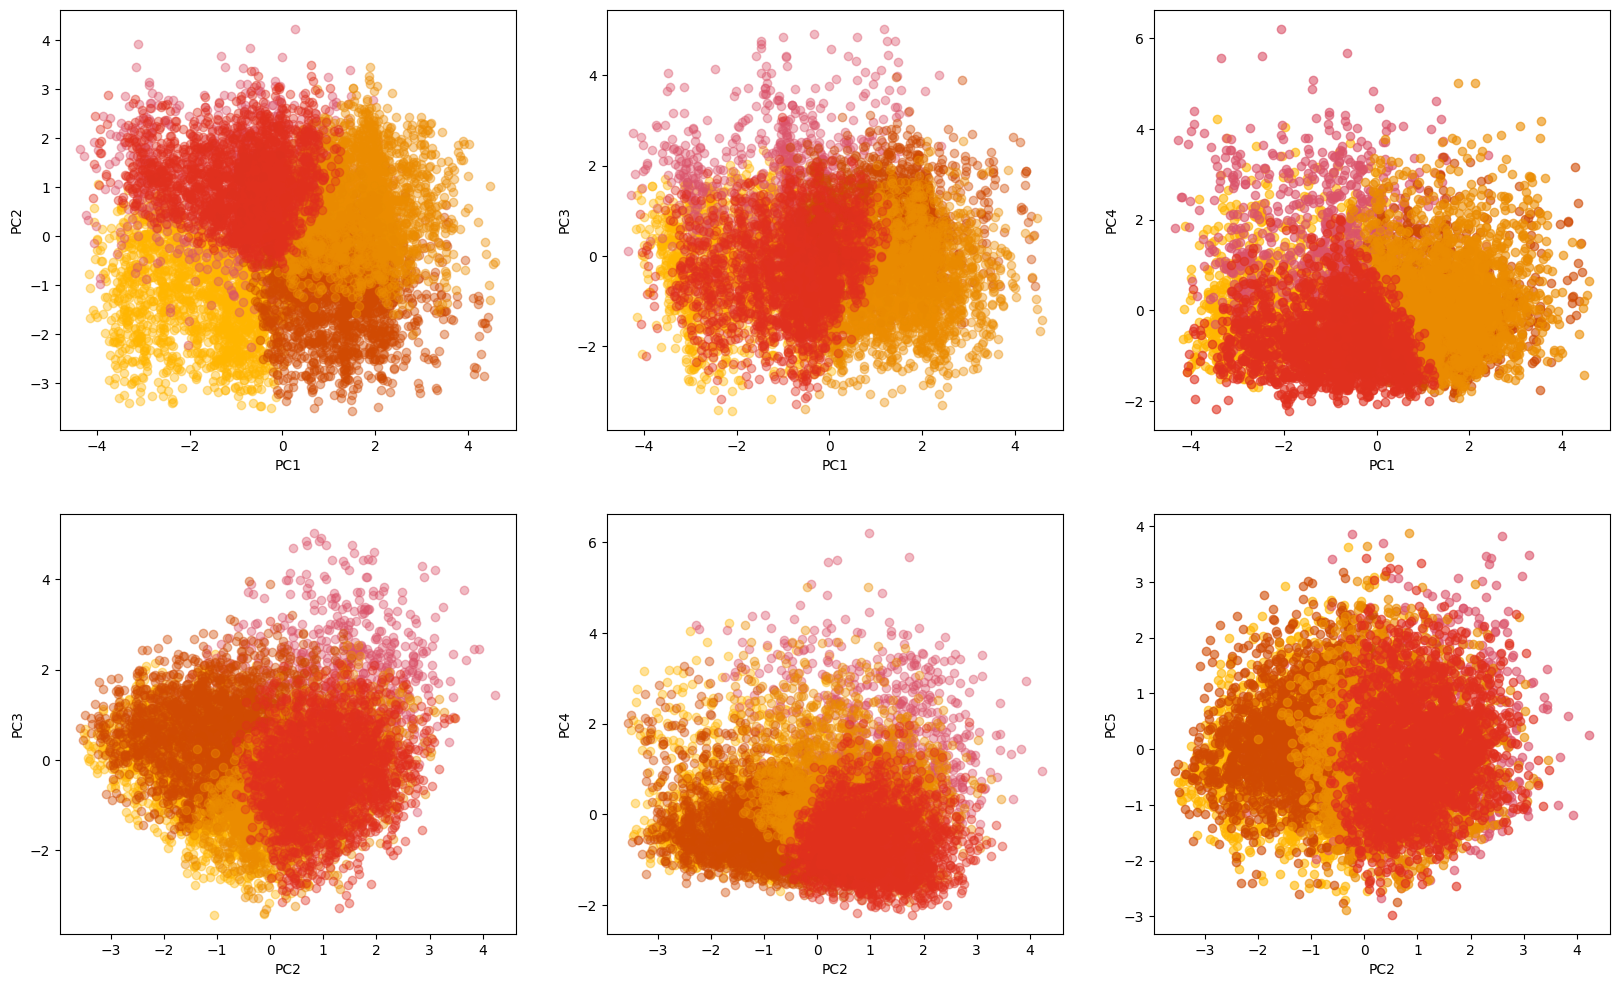

In [11]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,12))

#PwC Colour palette
color_palette = ['#FFB600','#DB536A','#D04A02','#EB8C00','#E0301E']

# Loop over each cluster for all 6 subplots
for i in range(0,5):
    ax1.scatter(FMADf_reduced[clusters == i]['PC1'], FMADf_reduced[clusters == i]['PC2'], color = color_palette[i], alpha=.40)
    ax2.scatter(FMADf_reduced[clusters == i]['PC1'], FMADf_reduced[clusters == i]['PC3'], color = color_palette[i], alpha=.40)
    ax3.scatter(FMADf_reduced[clusters == i]['PC1'], FMADf_reduced[clusters == i]['PC4'], color = color_palette[i], alpha=.60)
    ax4.scatter(FMADf_reduced[clusters == i]['PC2'], FMADf_reduced[clusters == i]['PC3'], color = color_palette[i], alpha=.40)
    ax5.scatter(FMADf_reduced[clusters == i]['PC2'], FMADf_reduced[clusters == i]['PC4'], color = color_palette[i], alpha=.40)
    ax6.scatter(FMADf_reduced[clusters == i]['PC2'], FMADf_reduced[clusters == i]['PC5'], color = color_palette[i], alpha=.60)

# Set subplot labels
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC3')
ax3.set_xlabel('PC1')
ax3.set_ylabel('PC4')
ax4.set_xlabel('PC2')
ax4.set_ylabel('PC3')
ax5.set_xlabel('PC2')
ax5.set_ylabel('PC4')
ax6.set_xlabel('PC2')
ax6.set_ylabel('PC5')
    
plt.show()

*Elbow plot for K*

*** 2 ***
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/10, moves: 229, ncost: 3938287.714493566
Run: 1, iteration: 2/10, moves: 105, ncost: 3934339.9551855996
Run: 1, iteration: 3/10, moves: 63, ncost: 3932946.962709168
Run: 1, iteration: 4/10, moves: 26, ncost: 3932745.5278749913
Run: 1, iteration: 5/10, moves: 7, ncost: 3932728.003155821
Run: 1, iteration: 6/10, moves: 0, ncost: 3932728.003155821
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/10, moves: 862, ncost: 4003711.6717593297
Run: 2, iteration: 2/10, moves: 372, ncost: 3948280.274712876
Run: 2, iteration: 3/10, moves: 118, ncost: 3942866.8725649365
Run: 2, iteration: 4/10, moves: 143, ncost: 3934218.2088995297
Run: 2, iteration: 5/10, moves: 61, ncost: 3932856.0468397406
Run: 2, iteration: 6/10, moves: 16, ncost: 3932768.5369507982
Run: 2, iteration: 7/10, moves: 11, ncost: 3932727.006395126
Run: 2, iteration: 8/10, m

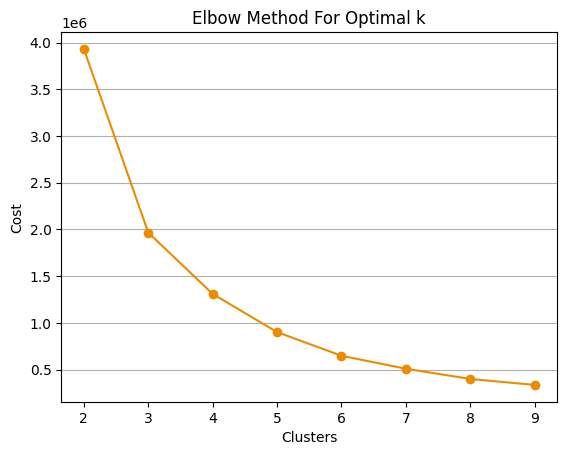

In [12]:
# Elbow curve to find optimal K
cost = []
K = range(2,10)
for num_clusters in list(K):
    print("***",num_clusters,"***")
    kproto = KPrototypes(n_clusters=num_clusters, init='random', verbose=2, max_iter=10)
    kproto.fit_predict(FMADf, categorical=[11, 12, 13]) 
    cost.append(kproto.cost_)
    
plt.plot(K, cost, '#EB8C00', marker = 'o')
plt.xlabel('Clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.grid(axis='y')
plt.show()